In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "/05-Matplotlib_Homework_Pymaceuticals_data_mouse_drug_data.csv"
clinical_trial_data_to_load = "05-Matplotlib_Homework_Pymaceuticals_data_clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
read_mouse_data = pd.read_csv(mouse_drug_data_to_load)
read_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset

combine_data = pd.merge(read_mouse_data, read_trial_data, on ="Mouse ID", how="outer")


# Display the data table for preview

combine_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [2]:
#Tumor Response to Treatment

# group by Drug and Timepoint

group = combine_data.groupby(["Drug", "Timepoint"])

# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

mean_tumor = group["Tumor Volume (mm3)"].mean()

# Convert to DataFrame

data_pf = pd.DataFrame(mean_tumor).reset_index()


# Preview DataFrame

data_pf.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

mean_tumor_sem = group["Tumor Volume (mm3)"].sem()

# Convert to DataFrame

mean_tumor_sem_df = pd.DataFrame(mean_tumor_sem).reset_index()


# Preview DataFrame

mean_tumor_sem_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames

mungled = data_pf.pivot(index = 'Timepoint', columns ='Drug', values = 'Tumor Volume (mm3)') 


# Preview that Reformatting worked

mungled.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


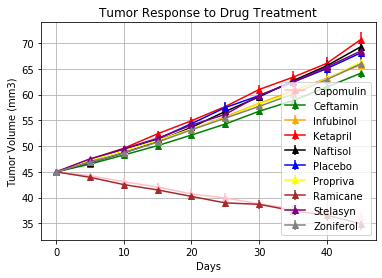

In [5]:
# Generate the Plot (with Error Bars)

Capomulin = mean_tumor_sem_df.loc[mean_tumor_sem_df["Drug"] == "Capomulin", "Tumor Volume (mm3)"]
Ceftamin = mean_tumor_sem_df.loc[mean_tumor_sem_df["Drug"] == "Ceftamin", "Tumor Volume (mm3)"]
Infubinol = mean_tumor_sem_df.loc[mean_tumor_sem_df["Drug"] == "Infubinol", "Tumor Volume (mm3)"]
Ketapril = mean_tumor_sem_df.loc[mean_tumor_sem_df["Drug"] == "Ketapril", "Tumor Volume (mm3)"]
Naftisol = mean_tumor_sem_df.loc[mean_tumor_sem_df["Drug"] == "Naftisol", "Tumor Volume (mm3)"]
Placebo = mean_tumor_sem_df.loc[mean_tumor_sem_df["Drug"] == "Placebo", "Tumor Volume (mm3)"]
Propriva = mean_tumor_sem_df.loc[mean_tumor_sem_df["Drug"] == "Propriva", "Tumor Volume (mm3)"]
Ramicane = mean_tumor_sem_df.loc[mean_tumor_sem_df["Drug"] == "Ramicane", "Tumor Volume (mm3)"]
Stelasyn = mean_tumor_sem_df.loc[mean_tumor_sem_df["Drug"] == "Stelasyn", "Tumor Volume (mm3)"]
Zoniferol = mean_tumor_sem_df.loc[mean_tumor_sem_df["Drug"] == "Zoniferol", "Tumor Volume (mm3)"]

days = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

# plot
plt.errorbar(days, mungled["Capomulin"] , yerr= Capomulin, label= "Capomulin", marker= "^", color="pink", linestyle='-')
plt.errorbar(days, mungled["Ceftamin"] , yerr= Ceftamin, label= "Ceftamin", marker= "^", color="green", linestyle='-')
plt.errorbar(days, mungled["Infubinol"] , yerr= Infubinol, label= "Infubinol", marker= "^", color="orange", linestyle='-')
plt.errorbar(days, mungled["Ketapril"] , yerr= Ketapril, label= "Ketapril", marker= "^", color="red", linestyle='-')
plt.errorbar(days, mungled["Naftisol"] , yerr= Naftisol, label= "Naftisol", marker= "^", color="black", linestyle='-')
plt.errorbar(days, mungled["Placebo"] , yerr= Placebo, label= "Placebo", marker= "^", color="blue", linestyle='-')
plt.errorbar(days, mungled["Propriva"] , yerr= Propriva, label= "Propriva", marker= "^", color="yellow", linestyle='-')
plt.errorbar(days, mungled["Ramicane"] , yerr= Ramicane, label= "Ramicane", marker= "^", color="brown", linestyle='-')
plt.errorbar(days, mungled["Stelasyn"] , yerr= Stelasyn, label= "Stelasyn", marker= "^", color="Purple", linestyle='-')
plt.errorbar(days, mungled["Zoniferol"] , yerr= Zoniferol, label= "Zoniferol", marker= "^", color="grey", linestyle='-')
#style

plt.legend()
plt.title("Tumor Response to Drug Treatment")
plt.xlabel("Days")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()

#display

plt.show()


# Save the Figure
#plt.savefig("/Tumor.png")

In [6]:
# Metastatic Response to Treatment

# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

mean_met = group["Metastatic Sites"].mean()

# Convert to DataFrame

mean_met_data = pd.DataFrame(mean_met).reset_index()


# Preview DataFrame

mean_met_data.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

mean_met_sem = group["Metastatic Sites"].sem()

# Convert to DataFrame

mean_met_sem_df = pd.DataFrame(mean_met_sem).reset_index()


# Preview DataFrame

mean_met_sem_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [8]:

# Minor Data Munging to Re-Format the Data Frames

mungled_met = mean_met_data.pivot(index = 'Timepoint', columns ='Drug', values = 'Metastatic Sites') 


# Preview that Reformatting worked

mungled_met.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


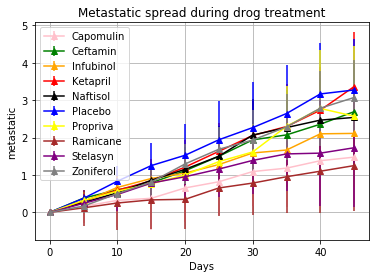

In [9]:
# Generate the Plot (with Error Bars)

Capomulin_met = mean_met_sem_df.loc[mean_met_sem_df["Drug"] == "Capomulin", "Metastatic Sites"]
Ceftamin_met = mean_met_sem_df.loc[mean_met_sem_df["Drug"] == "Ceftamin", "Metastatic Sites"]
Infubinol_met = mean_met_sem_df.loc[mean_met_sem_df["Drug"] == "Infubinol", "Metastatic Sites"]
Ketapril_met = mean_met_sem_df.loc[mean_met_sem_df["Drug"] == "Ketapril", "Metastatic Sites"]
Naftisol_met = mean_met_sem_df.loc[mean_met_sem_df["Drug"] == "Naftisol", "Metastatic Sites"]
Placebo_met = mean_met_sem_df.loc[mean_met_sem_df["Drug"] == "Placebo", "Metastatic Sites"]
Propriva_met = mean_met_sem_df.loc[mean_met_sem_df["Drug"] == "Propriva", "Metastatic Sites"]
Ramicane_met = mean_met_sem_df.loc[mean_met_sem_df["Drug"] == "Ramicane", "Metastatic Sites"]
Stelasyn_met = mean_met_sem_df.loc[mean_met_sem_df["Drug"] == "Stelasyn", "Metastatic Sites"]
Zoniferol_met = mean_met_sem_df.loc[mean_met_sem_df["Drug"] == "Zoniferol", "Metastatic Sites"]

days = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

#plot
plt.errorbar(days, mungled_met["Capomulin"] , yerr= Capomulin, label= "Capomulin", marker= "^", color="pink", linestyle='-')
plt.errorbar(days, mungled_met["Ceftamin"] , yerr= Ceftamin, label= "Ceftamin", marker= "^", color="green", linestyle='-')
plt.errorbar(days, mungled_met["Infubinol"] , yerr= Infubinol, label= "Infubinol", marker= "^", color="orange", linestyle='-')
plt.errorbar(days, mungled_met["Ketapril"] , yerr= Ketapril, label= "Ketapril", marker= "^", color="red", linestyle='-')
plt.errorbar(days, mungled_met["Naftisol"] , yerr= Naftisol, label= "Naftisol", marker= "^", color="black", linestyle='-')
plt.errorbar(days, mungled_met["Placebo"] , yerr= Placebo, label= "Placebo", marker= "^", color="blue", linestyle='-')
plt.errorbar(days, mungled_met["Propriva"] , yerr= Propriva, label= "Propriva", marker= "^", color="yellow", linestyle='-')
plt.errorbar(days, mungled_met["Ramicane"] , yerr= Ramicane, label= "Ramicane", marker= "^", color="brown", linestyle='-')
plt.errorbar(days, mungled_met["Stelasyn"] , yerr= Stelasyn, label= "Stelasyn", marker= "^", color="Purple", linestyle='-')
plt.errorbar(days, mungled_met["Zoniferol"] , yerr= Zoniferol, label= "Zoniferol", marker= "^", color="grey", linestyle='-')
#style

plt.legend()
plt.title("Metastatic spread during drog treatment")
plt.xlabel("Days")
plt.ylabel("metastatic")
plt.grid()

#display

plt.show()


# Save the Figure
#plt.savefig("/met_response.png")

In [10]:
# Survival Rates

# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

Group_data = combine_data.groupby(["Drug", "Timepoint"])

Count_Mice_Data = Group_data["Mouse ID"].count()

# Convert to DataFrame

mice_df = pd.DataFrame(Count_Mice_Data).reset_index()
mouse_count = mice_df.rename(columns={"Mouse ID": "Mouse Count"})


#mice_df.head()
# Preview DataFrame
mouse_count.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [11]:
# Minor Data Munging to Re-Format the Data Frames

mungled_mice = mice_df.pivot(index = 'Timepoint', columns ='Drug', values = "Mouse ID") 


# Preview the Data Frame

mungled_mice.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


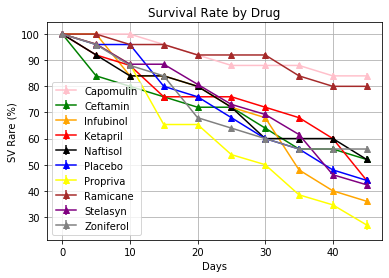

In [12]:
# Generate the Plot (Accounting for percentages)

mungled_mice_per = mungled_mice

mungled_mice_per = mungled_mice_per.apply(lambda c: c / c.max() * 100, axis=0)


#plot
plt.errorbar(days, mungled_mice_per["Capomulin"] , yerr= Capomulin, label= "Capomulin", marker= "^", color="pink", linestyle='-')
plt.errorbar(days, mungled_mice_per["Ceftamin"] , yerr= Ceftamin, label= "Ceftamin", marker= "^", color="green", linestyle='-')
plt.errorbar(days, mungled_mice_per["Infubinol"] , yerr= Infubinol, label= "Infubinol", marker= "^", color="orange", linestyle='-')
plt.errorbar(days, mungled_mice_per["Ketapril"] , yerr= Ketapril, label= "Ketapril", marker= "^", color="red", linestyle='-')
plt.errorbar(days, mungled_mice_per["Naftisol"] , yerr= Naftisol, label= "Naftisol", marker= "^", color="black", linestyle='-')
plt.errorbar(days, mungled_mice_per["Placebo"] , yerr= Placebo, label= "Placebo", marker= "^", color="blue", linestyle='-')
plt.errorbar(days, mungled_mice_per["Propriva"] , yerr= Propriva, label= "Propriva", marker= "^", color="yellow", linestyle='-')
plt.errorbar(days, mungled_mice_per["Ramicane"] , yerr= Ramicane, label= "Ramicane", marker= "^", color="brown", linestyle='-')
plt.errorbar(days, mungled_mice_per["Stelasyn"] , yerr= Stelasyn, label= "Stelasyn", marker= "^", color="Purple", linestyle='-')
plt.errorbar(days, mungled_mice_per["Zoniferol"] , yerr= Zoniferol, label= "Zoniferol", marker= "^", color="grey", linestyle='-')
#style

plt.legend()
plt.title("Survival Rate by Drug")
plt.xlabel("Days")
plt.ylabel("SV Rare (%)")
plt.grid()

#display

plt.show()

# Save the Figure
#plt.savefig("/survival_rate.png")



In [13]:
# Calculate the percent changes for each drug
# initial tumor volume: 45.000000 mm3
change = mungled.loc[45, :]
perc_change = (change - 45)/45 * 100
# get the index
perc_change.index
# Display the data to confirm
perc_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: 45, dtype: float64

In [23]:
# Store all Relevant Percent Changes into a Tuple
dataturp = tuple(zip((perc_change.index,perc_change)))
listn = list(dataturp)


# Splice the data between passing and failing drugs 


